In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('/scratch/phys/sin/sethih1/data_files/all_group_images_new/10009.npz')

In [3]:
help(data)

Help on NpzFile in module numpy.lib.npyio object:

class NpzFile(collections.abc.Mapping)
 |  NpzFile(fid, own_fid=False, allow_pickle=False, pickle_kwargs=None, *, max_header_size=10000)
 |  
 |  NpzFile(fid)
 |  
 |  A dictionary-like object with lazy-loading of files in the zipped
 |  archive provided on construction.
 |  
 |  `NpzFile` is used to load files in the NumPy ``.npz`` data archive
 |  format. It assumes that files in the archive have a ``.npy`` extension,
 |  other files are ignored.
 |  
 |  The arrays and file strings are lazily loaded on either
 |  getitem access using ``obj['key']`` or attribute lookup using
 |  ``obj.f.key``. A list of all files (without ``.npy`` extensions) can
 |  be obtained with ``obj.files`` and the ZipFile object itself using
 |  ``obj.zip``.
 |  
 |  Attributes
 |  ----------
 |  files : list of str
 |      List of all files in the archive with a ``.npy`` extension.
 |  zip : ZipFile instance
 |      The ZipFile object initialized with the zi

In [4]:
data.files

['atom_pos', 'atomic_numbers', 'x_pos', 'y_pos', 'frequencies', 'spectrums']

In [5]:
print(data['atom_pos'].shape)
print(data['atomic_numbers'].shape)
print(data['x_pos'].shape)
print(data['y_pos'].shape)
print(data['frequencies'].shape)
print(data['spectrums'].shape)

(13, 3)
(13,)
(64,)
(64,)
(33,)
(64, 64, 33)


In [46]:
print(data['atomic_numbers'].shape)
print(data['atom_pos'].shape)


t = list(zip(data['atomic_numbers'], data['atom_pos']))

(13,)
(13, 3)


In [47]:
t

[(np.int64(7), array([ 1.101043, -1.242036,  0.103446])),
 (np.int64(7), array([-2.32007 ,  0.064217, -0.308245])),
 (np.int64(6), array([-0.942091,  0.054758, -0.094828])),
 (np.int64(6), array([-0.196003,  1.241208,  0.001476])),
 (np.int64(6), array([-0.222915, -1.157794, -0.032069])),
 (np.int64(6), array([1.187871, 1.159192, 0.143263])),
 (np.int64(6), array([ 1.795586, -0.09836 ,  0.187512])),
 (np.int64(1), array([-0.698585,  2.211788, -0.038846])),
 (np.int64(1), array([-0.767477, -2.108442, -0.09927 ])),
 (np.int64(1), array([1.791166, 2.066586, 0.220366])),
 (np.int64(1), array([ 2.880272, -0.193584,  0.296971])),
 (np.int64(1), array([-2.798421, -0.78505 , -0.0213  ])),
 (np.int64(1), array([-2.800156,  0.888542,  0.040968]))]

In [61]:
text = f"{len(t)}\nComment\n"
for i in range(len(t)):
    atom, pos = t[i]
    pos_str = "\t".join(f"{coord:.6f}" for coord in pos)
    text += atomic_symbols[atom] + "\t" +  pos_str + "\n"
print(text)

13
Comment
N	1.101043	-1.242036	0.103446
N	-2.320070	0.064217	-0.308245
C	-0.942091	0.054758	-0.094828
C	-0.196003	1.241208	0.001476
C	-0.222915	-1.157794	-0.032069
C	1.187871	1.159192	0.143263
C	1.795586	-0.098360	0.187512
H	-0.698585	2.211788	-0.038846
H	-0.767477	-2.108442	-0.099270
H	1.791166	2.066586	0.220366
H	2.880272	-0.193584	0.296971
H	-2.798421	-0.785050	-0.021300
H	-2.800156	0.888542	0.040968



In [48]:
atomic_symbols = {
    1: "H",   # Hydrogen
    2: "He",  # Helium
    3: "Li",  # Lithium
    4: "Be",  # Beryllium
    5: "B",   # Boron
    6: "C",   # Carbon
    7: "N",   # Nitrogen
    8: "O",   # Oxygen
    9: "F",   # Fluorine
    10: "Ne", # Neon
    11: "Na", # Sodium
    12: "Mg", # Magnesium
    13: "Al", # Aluminum
    14: "Si", # Silicon
    15: "P",  # Phosphorus
    16: "S",  # Sulfur
    17: "Cl", # Chlorine
    18: "Ar", # Argon
    19: "K",  # Potassium
    20: "Ca", # Calcium
    21: "Sc", # Scandium
    22: "Ti", # Titanium
    23: "V",  # Vanadium
    24: "Cr", # Chromium
    25: "Mn", # Manganese
    26: "Fe", # Iron
    27: "Co", # Cobalt
    28: "Ni", # Nickel
    29: "Cu", # Copper
    30: "Zn", # Zinc
    31: "Ga", # Gallium
    32: "Ge", # Germanium
    33: "As", # Arsenic
    34: "Se", # Selenium
    35: "Br", # Bromine
    36: "Kr", # Krypton
    37: "Rb", # Rubidium
    38: "Sr", # Strontium
    39: "Y",  # Yttrium
    40: "Zr", # Zirconium
}


Visualizing spectral cube with 33 channels.


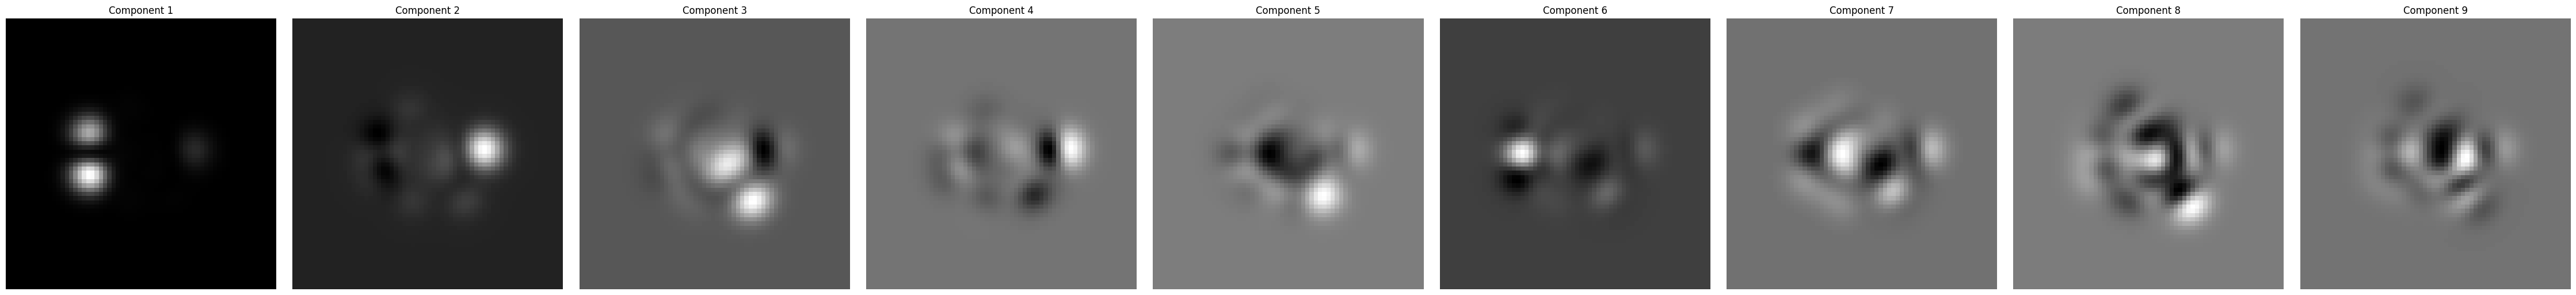

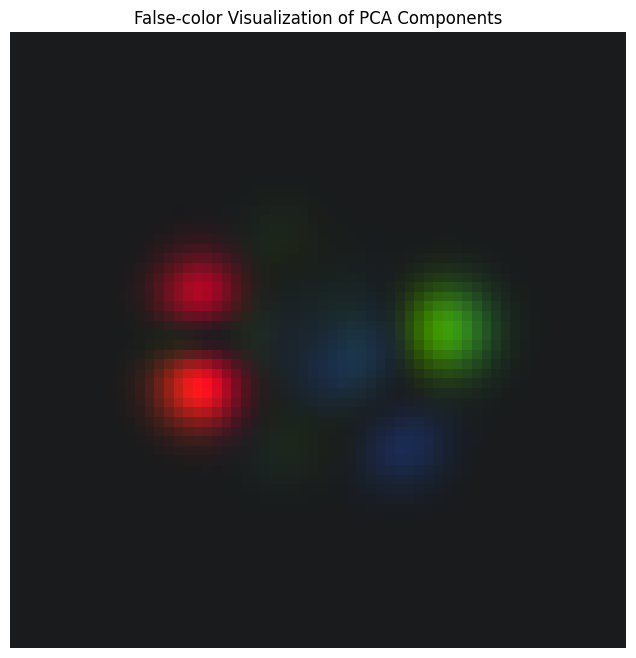

Explained Variance Ratio for the top 9 components:
Component 1: 0.6470528442593334
Component 2: 0.20251997851563916
Component 3: 0.06894344772080517
Component 4: 0.025424575954678983
Component 5: 0.017727654843365796
Component 6: 0.014540736209670753
Component 7: 0.01306429089040032
Component 8: 0.0061163493389796665
Component 9: 0.004610122267129779
Visualizing original spectral cube with 33 channels.


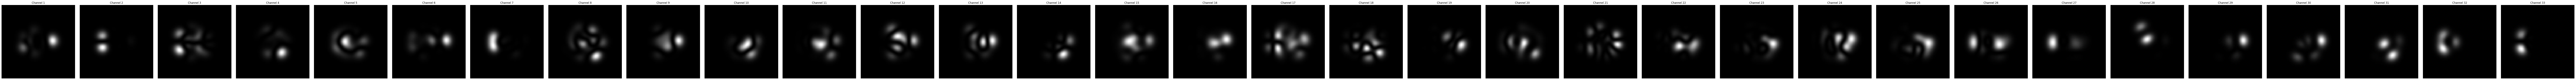

In [75]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def apply_pca_to_spectral_cube(spectral_cube, n_components=3):
    """
    Apply PCA to the spectral cube and return the top n components.
    """
    # Reshape the spectral cube to (H*W, Channels)
    h, w, channels = spectral_cube.shape
    spectral_data = spectral_cube.reshape(-1, channels)  # Flatten the image
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(spectral_data)
    
    # Reshape the PCA result back to image shape (H, W, n_components)
    pca_images = pca_result.reshape(h, w, n_components)
    
    return pca_images

def visualize_spectral_cube(spectral_cube, n_components=3):
    print(f"Visualizing spectral cube with {spectral_cube.shape[2]} channels.")
    
    # Apply PCA to reduce dimensionality
    pca_images = apply_pca_to_spectral_cube(spectral_cube, n_components=n_components)
    
    # Create subplots for each PCA component with a larger figure size
    fig, axes = plt.subplots(1, n_components, figsize=(5 * n_components, 5))
    for i in range(n_components):
        ax = axes[i]
        ax.imshow(pca_images[..., i], cmap='gray')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    
    # Create a false-color image from PCA components
    false_color_image = np.zeros((pca_images.shape[0], pca_images.shape[1], 3))
    for i in range(3):
        if i < n_components:
            false_color_image[..., i] = pca_images[..., i]
    
    # Normalize the image for visualization
    false_color_image = (false_color_image - np.min(false_color_image)) / (np.max(false_color_image) - np.min(false_color_image))  # Normalize to [0, 1]
    
    plt.figure(figsize=(8, 8))
    plt.imshow(false_color_image)
    plt.title(f"False-color Visualization of PCA Components")
    plt.axis('off')
    plt.show()
    
    # Print explained variance ratio of the top components
    print(f"Explained Variance Ratio for the top {n_components} components:")
    for i in range(n_components):
        print(f"Component {i+1}: {np.var(pca_images[..., i]) / np.sum(np.var(pca_images, axis=(0, 1)))}")

def visualize_original_spectral_cube(spectral_cube):
    print(f"Visualizing original spectral cube with {spectral_cube.shape[2]} channels.")
    
    # Create subplots for each channel in the original spectral cube
    channels = spectral_cube.shape[2]
    fig, axes = plt.subplots(1, channels, figsize=(5 * channels, 5))
    for i in range(channels):
        ax = axes[i]
        ax.imshow(spectral_cube[..., i], cmap='gray')
        ax.set_title(f'Channel {i+1}')
        ax.axis('off')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage
n_components = 9  # Number of PCA components to visualize
# Assuming `spectral_cube` is already loaded and available
# spectral_cube = ... (load your spectral cube data here)
visualize_spectral_cube(spectral_cube, n_components)
visualize_original_spectral_cube(spectral_cube)

In [7]:
data.files

['atom_pos', 'atomic_numbers', 'x_pos', 'y_pos', 'frequencies', 'spectrums']

In [57]:
data['spectrums'].shape

(64, 64, 33)

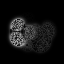

In [58]:
from PIL import Image

# Convert the spectrums to PIL images
images = [Image.fromarray((data['spectrums'][..., i] * 255).astype(np.uint8)) for i in range(data['spectrums'].shape[-1])]

# Blend the images
blended_image = images[0]
for i in range(1, len(images)):
    blended_image = Image.blend(blended_image, images[i], alpha=0.5)  # Adjust alpha as needed

# Show the blended image
blended_image.show()

Visualizing spectral cube for molecule  with channels.


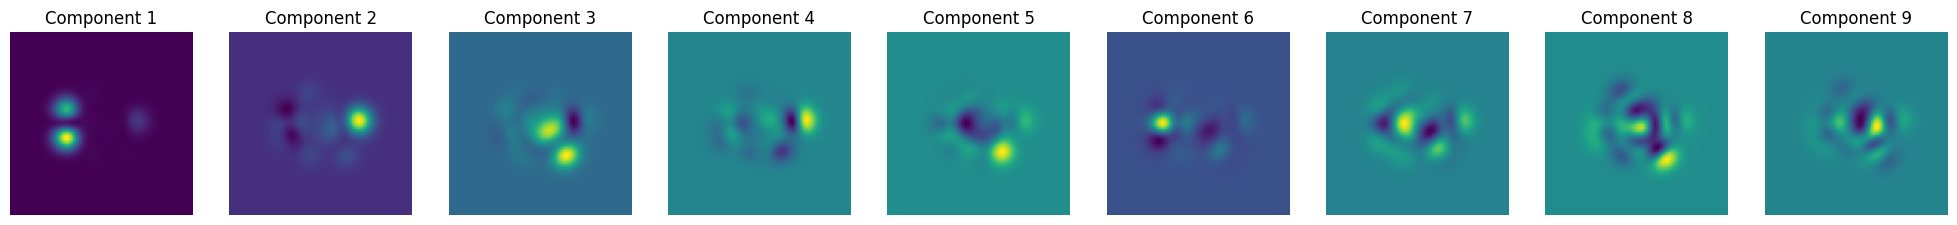

Explained Variance Ratio for the top 9 components:
Component 1: 0.6470528442593334
Component 2: 0.20251997851563916
Component 3: 0.06894344772080517
Component 4: 0.025424575954678983
Component 5: 0.017727654843365796
Component 6: 0.014540736209670753
Component 7: 0.01306429089040032
Component 8: 0.0061163493389796665
Component 9: 0.004610122267129779


In [59]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


def apply_pca_to_spectral_cube(spectral_cube, n_components=3):
    """
    Apply PCA to the spectral cube and return the top n components.
    """
    # Reshape the spectral cube to (H*W, Channels)
    h, w, channels = spectral_cube.shape
    spectral_data = spectral_cube.reshape(-1, channels)  # Flatten the image
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(spectral_data)
    
    # Reshape the PCA result back to image shape (H, W, n_components)
    pca_images = pca_result.reshape(h, w, n_components)
    
    return pca_images

def visualize_spectral_cube(n_components=3):
    

    print(f"Visualizing spectral cube for molecule  with channels.")
    
 
    spectral_cube = data['spectrums']  # Shape: (H, W, Channels)
    
    # Apply PCA to reduce dimensionality
    pca_images = apply_pca_to_spectral_cube(spectral_cube, n_components=n_components)
    
    # Create subplots for each PCA component
    fig, axes = plt.subplots(1, n_components, figsize=(25, 25))
    for i in range(n_components):
        ax = axes[i]
        ax.imshow(pca_images[..., i])
        ax.set_title(f'Component {i+1}')
        ax.axis('off')
    
    plt.show()
    
    # Print explained variance ratio of the top components
    print(f"Explained Variance Ratio for the top {n_components} components:")
    for i in range(n_components):
        print(f"Component {i+1}: {np.var(pca_images[..., i]) / np.sum(np.var(pca_images, axis=(0, 1)))}")


n_components = 9  # Number of PCA components to visualize
visualize_spectral_cube(n_components)

Visualizing spectral cube with 33 channels.


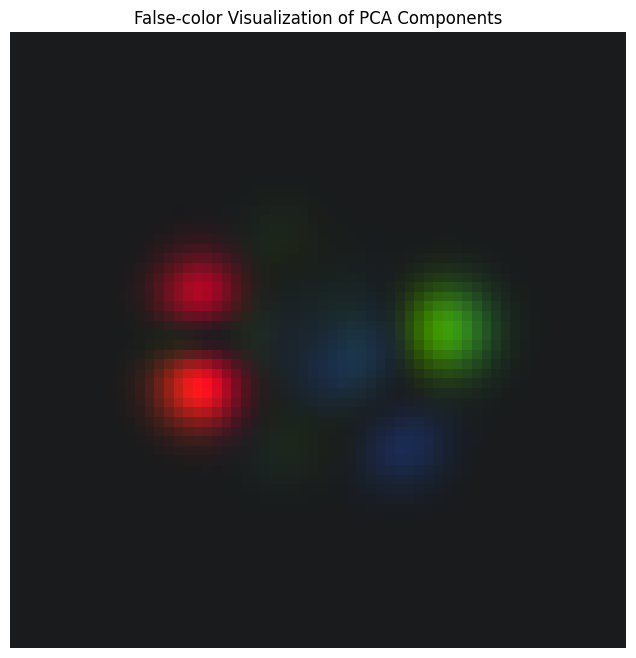

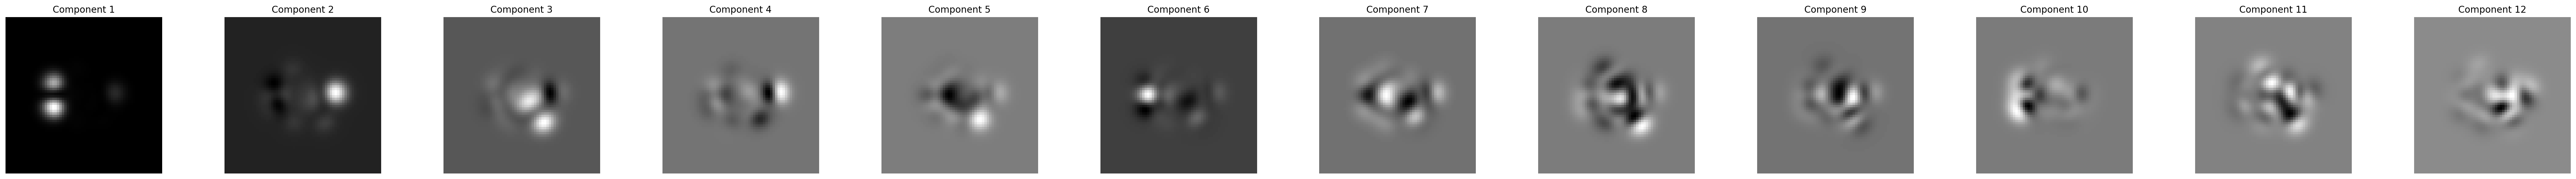

Explained Variance Ratio for the top 12 components:
Component 1: 0.6427320433677626
Component 2: 0.20116761833131308
Component 3: 0.06848306660506955
Component 4: 0.025254799202397593
Component 5: 0.01760927553705063
Component 6: 0.014443638072267836
Component 7: 0.012977051957401583
Component 8: 0.006075506418789318
Component 9: 0.004579337423853391
Component 10: 0.0029452961611315717
Component 11: 0.0022389326098177643
Component 12: 0.001493434313147965


In [63]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def apply_pca_to_spectral_cube(spectral_cube, n_components=3):
    """
    Apply PCA to the spectral cube and return the top n components.
    """
    # Reshape the spectral cube to (H*W, Channels)
    h, w, channels = spectral_cube.shape
    spectral_data = spectral_cube.reshape(-1, channels)  # Flatten the image
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(spectral_data)
    
    # Reshape the PCA result back to image shape (H, W, n_components)
    pca_images = pca_result.reshape(h, w, n_components)
    
    return pca_images

def visualize_spectral_cube(spectral_cube, n_components=3):
    print(f"Visualizing spectral cube with {spectral_cube.shape[2]} channels.")
    
    # Apply PCA to reduce dimensionality
    pca_images = apply_pca_to_spectral_cube(spectral_cube, n_components=n_components)
    
    # Create a false-color image from PCA components
    false_color_image = np.zeros((pca_images.shape[0], pca_images.shape[1], 3))
    for i in range(3):
        if i < n_components:
            false_color_image[..., i] = pca_images[..., i]
    
    # Normalize the image for visualization
    false_color_image = (false_color_image - np.min(false_color_image)) / (np.max(false_color_image) - np.min(false_color_image))  # Normalize to [0, 1]
    
    plt.figure(figsize=(8, 8))
    plt.imshow(false_color_image)
    plt.title(f"False-color Visualization of PCA Components")
    plt.axis('off')
    plt.show()
    
    # Create subplots for each PCA component
    fig, axes = plt.subplots(1, n_components, figsize=(5*n_components, 55), dpi=200)
    for i in range(n_components):
        ax = axes[i]
        ax.imshow(pca_images[..., i], cmap='gray')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()
    
    # Print explained variance ratio of the top components
    print(f"Explained Variance Ratio for the top {n_components} components:")
    for i in range(n_components):
        print(f"Component {i+1}: {np.var(pca_images[..., i]) / np.sum(np.var(pca_images, axis=(0, 1)))}")

# Example usage
n_components = 12  # Number of PCA components to visualize
# Assuming `spectral_cube` is already loaded and available
# spectral_cube = ... (load your spectral cube data here)
spectral_cube = data['spectrums']
visualize_spectral_cube(spectral_cube, n_components)

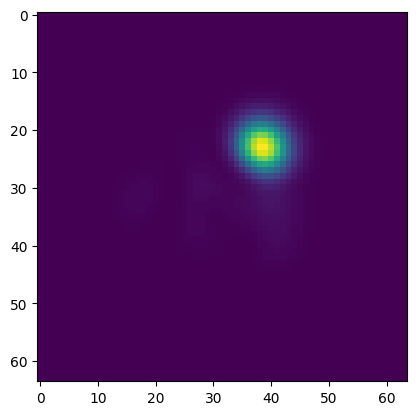

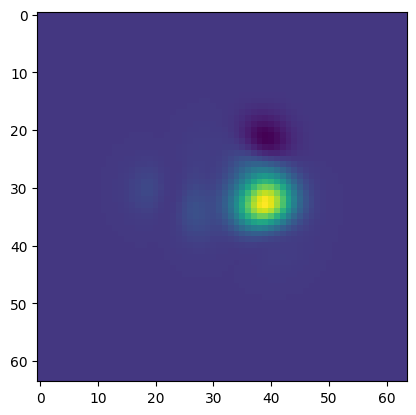

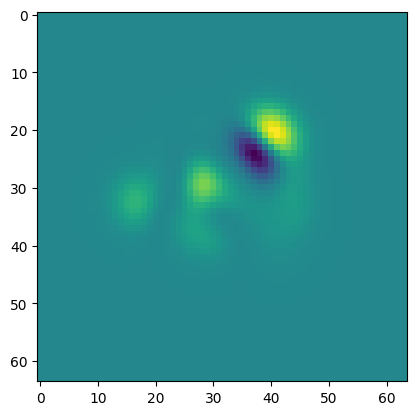

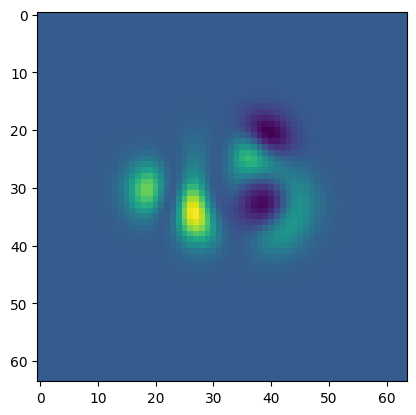

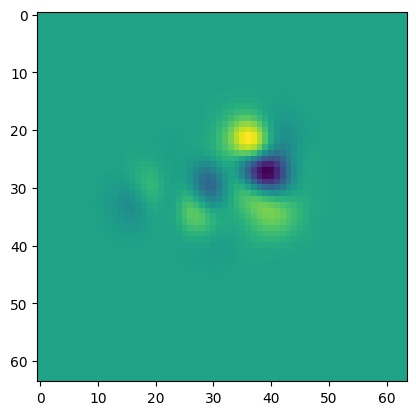

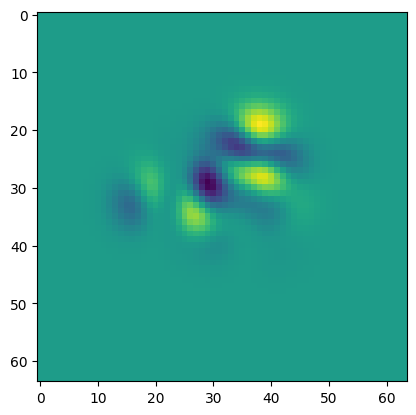

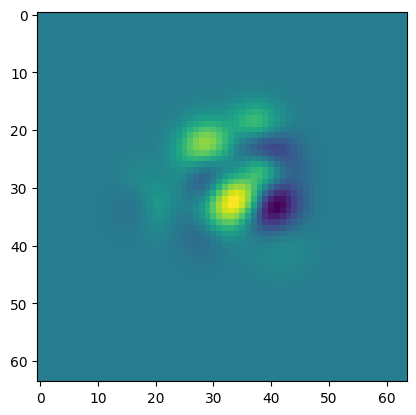

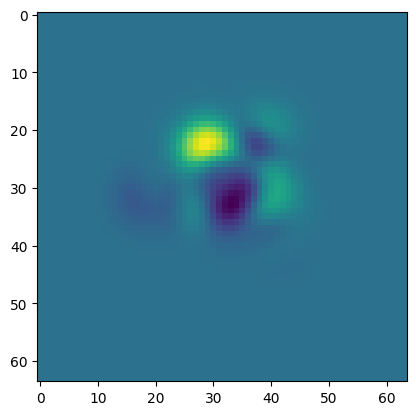

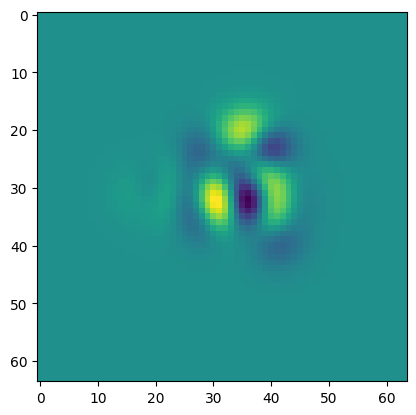

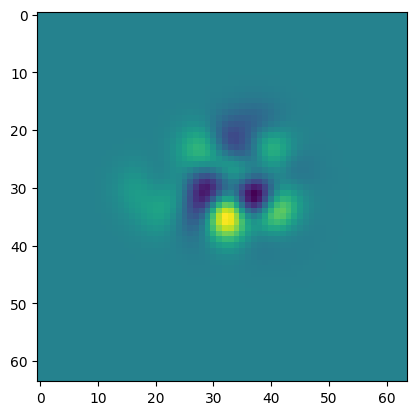

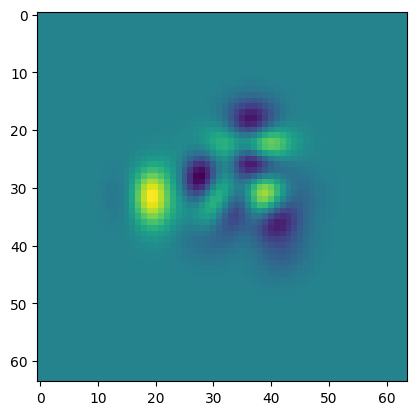

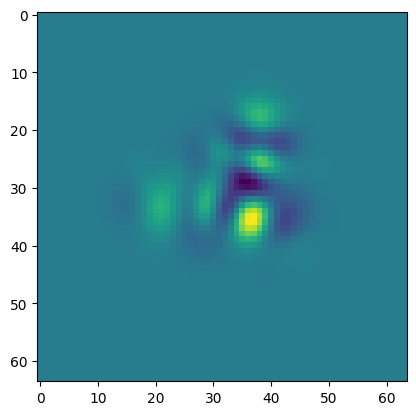

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


# Reshape the data to 2D (samples, features) for PCA
reshaped_data = data['spectrums'].reshape(-1, data['spectrums'].shape[-1])

# Perform PCA
pca = PCA(n_components=12)  # Adjust the number of components as needed
pca_result = pca.fit_transform(reshaped_data)

# Reshape the PCA result back to the original shape
pca_images = pca_result.reshape(data['spectrums'].shape[0], data['spectrums'].shape[1], 12)


# Plot the PCA components
for i in range(pca_images.shape[-1]):
    plt.imshow(pca_images[..., i])  # Use 'gray' colormap for better visualization
    plt.show()

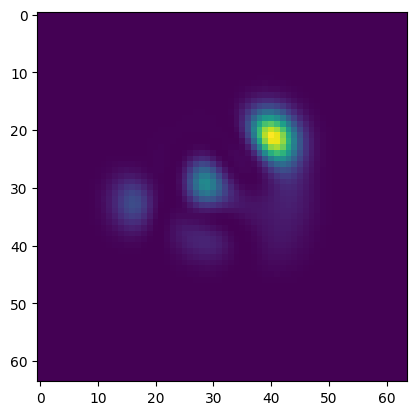

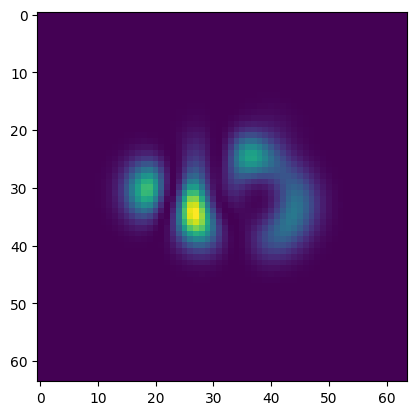

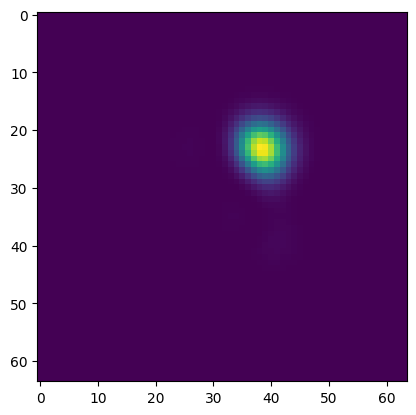

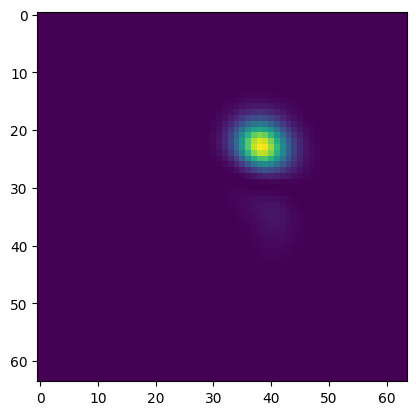

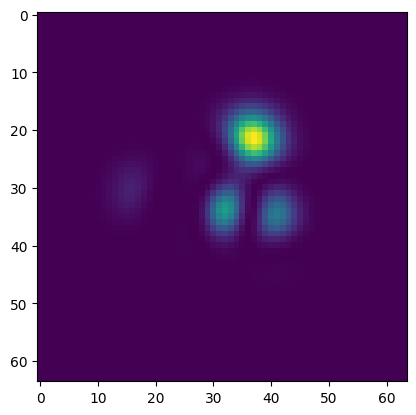

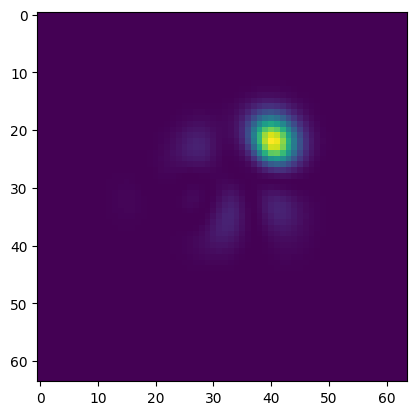

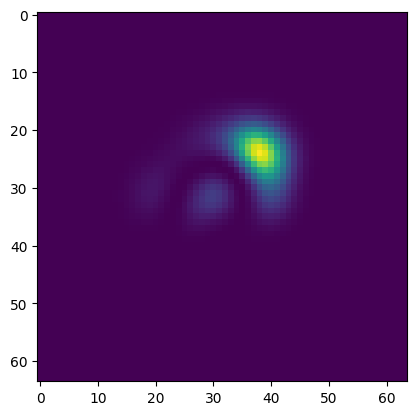

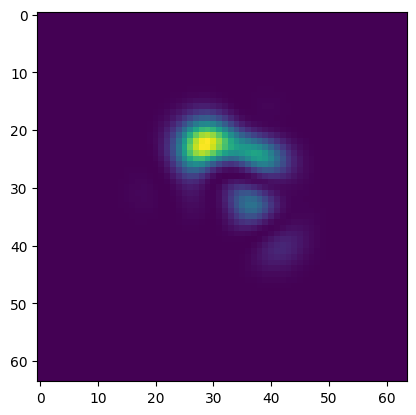

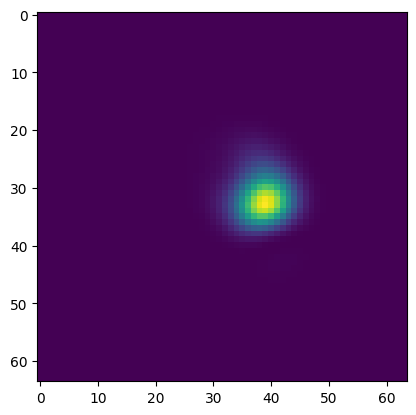

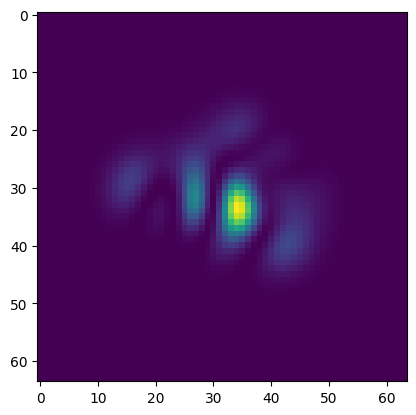

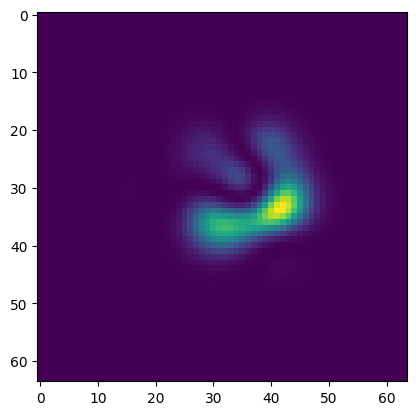

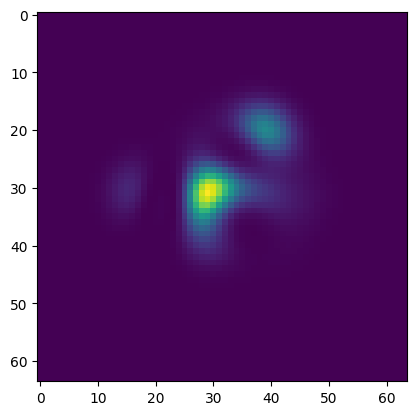

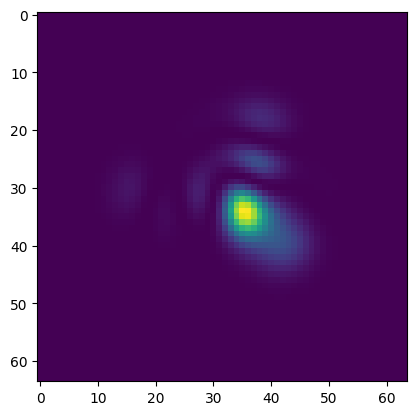

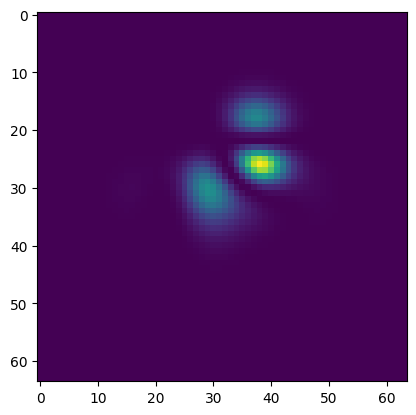

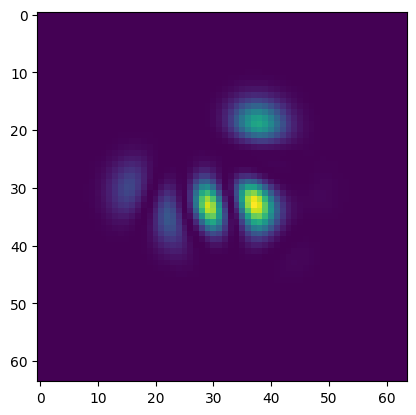

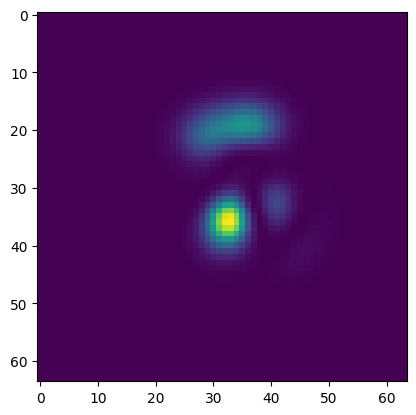

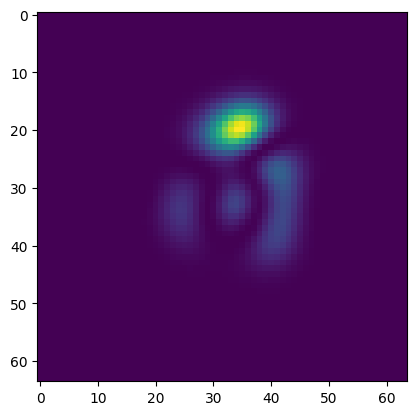

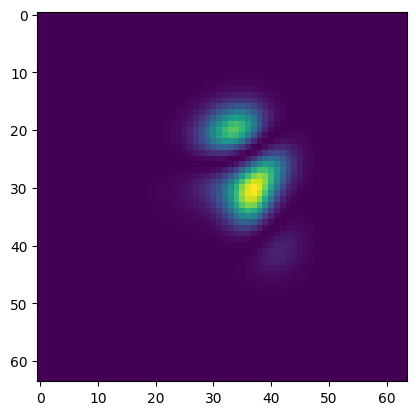

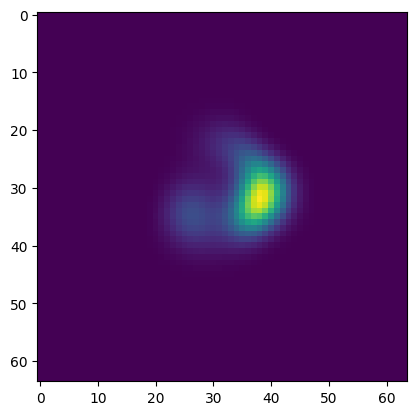

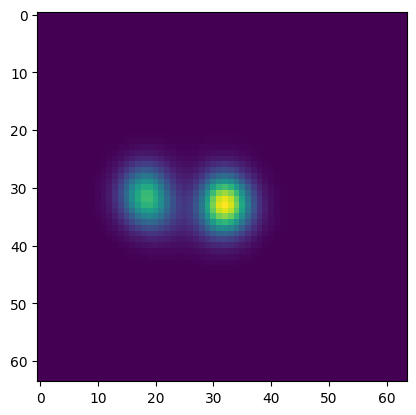

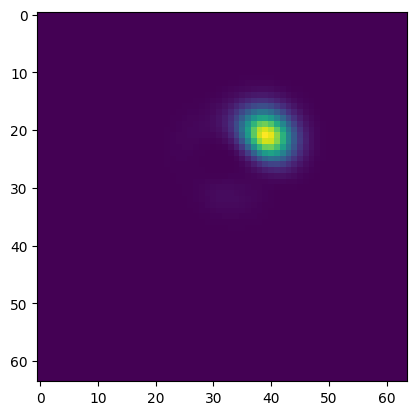

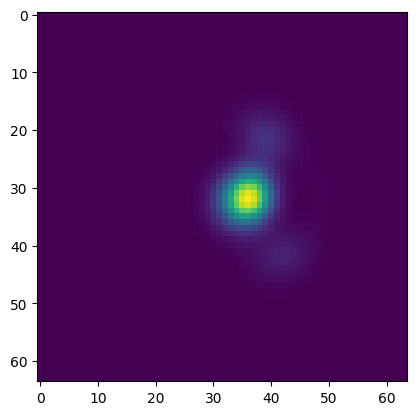

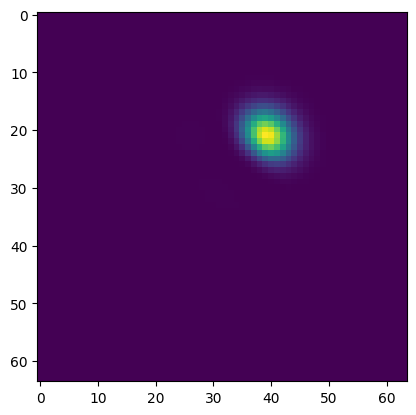

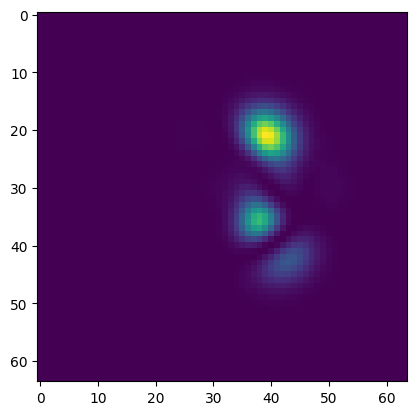

In [20]:
data['spectrums'][..., 0]
for i in range(data['spectrums'].shape[-1]):
    plt.imshow(data['spectrums'][..., i])
    plt.show()